#**Elon Musk's Twitter: Style and Influence**
John Flanagan

##**Preliminary Work:**

In [ ]:
pip install pytrends

In [ ]:
pip install yfinance

In [ ]:
# import all necessary libraries
import pandas as pd                    
from pytrends.request import TrendReq
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import json
import requests
import re
import csv
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime
import plotly.io as pio

In [ ]:
def cleantext(text):
  '''removes unnecessary characters from tweets'''
  text = re.sub(r"@[A-Za-z0-9]+", "", text) # removes mentions
  text = re.sub(r"#", "", text) # removes hashtag symbols
  text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
  text = re.sub(r"https?:\/\/\S+", "", text) # removes hyperlinks
  text = re.sub(r"amp", "", text) # removes "amp"
  return text

def norm(data):
  '''normalizes the data'''
  return (data)/(data.max()-data.min())

def sentiment_analysis(df):
  '''returns series object with subjectivity and polarity scores from TextBlob sentiment analyzer'''
  sentiment = TextBlob(df["tweet"]).sentiment
  return pd.Series([sentiment.subjectivity, sentiment.polarity])

def analysis(score):
  '''determines if sentiment is negative, neutral, or positive'''
  if score < 0:
      return "negative"
  elif score == 0:
      return "neutral"
  else:
      return "positive"

In [ ]:
rows = []
# reads each Elon Musk Twitter csv file, adds data to the list "rows"
for year in range (2020, 2023):
  with open(str(year) + ".csv", newline="") as fh:
    lines = csv.reader(fh)
    header = True
    for line in lines:
      if header:
        header = False
        continue
      line.append(year)
      rows.append(line)


doge_rows = []
# reads the Dogecoin stock csv file, adds data to the list "doge_rows"
with open("DOGE-USD.csv") as fh:
  lines = csv.reader(fh)
  header = True
  for line in lines:
    if header:
      header = False
      continue
    doge_rows.append(line)

# Creates DataFrames for the Elon Musk tweets and for the Dogecoin stock data
df = pd.DataFrame(rows, columns=['index', 'id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'year']) 
dogecoin_df = pd.DataFrame(doge_rows, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
#dogecoin_df = dogecoin_df.set_index('Date')

# Delete useless columns in DataFrame
del df['index'], df['id'], df['conversation_id'], df['timezone'], df['user_id'], df['place'], df['language'], df['urls'], df['photos'], df['hashtags'], df['cashtags'], df['link'], df['retweet'], df['quote_url'], df['video'], df['thumbnail'], df['near'], df['geo'], df['source'], df['user_rt_id'], df['user_rt'], df['retweet_id'], df['reply_to'], df['retweet_date'], df['translate'], df['trans_src'], df['trans_dest'], df['user_id_str'], df['search'], df['day'], df['hour']

# creates a new column for Dogecoin DataFrame that converts each date into a datetime.datetime object
dogecoin_date_list = dogecoin_df['Date'].tolist()

for i in range(len(dogecoin_date_list)):
  dogecoin_date_list[i] = datetime.datetime.strptime(dogecoin_date_list[i], "%Y-%m-%d")
dogecoin_df["Date"] = dogecoin_date_list

dogecoin_df = dogecoin_df.set_index("Date")

# cleans useless information from the tweets
df["tweet"] = df["tweet"].apply(cleantext)
# converts likes, replies, and retweets from Elon Musk DataFrame to int
df["nlikes"] = df["nlikes"].astype("int")
df["nreplies"] = df["nreplies"].astype("int")
df["nretweets"] = df["nretweets"].astype("int")
# converts open price from Dogecoin DataFrame to float
dogecoin_df["Open"] = dogecoin_df["Open"].astype("float")

In [ ]:
# creates empty lists to store dates in which Elon Musk said specific keywords
tesla_dates = []
bitcoin_dates = []
twitter_dates = []
dogecoin_dates = []
spacex_dates = []
total_dates = []
# creates different lists with words related to a specific company
tesla_list = ["tesla"]
bitcoin_list = ["bitcoin"]
twitter_list = ["twitter"]
dogecoin_list = ["dogecoin", "Doge-1", "dog"]
spacex_list = ["mars", "moon", "starship", "space", "satellite", "falcon 9", "nasa", "starlink", "crew-2", "dragon"]

# runs through each row of the Elon Musk DataFrame
for index, value in df.iterrows():
  # if the tweet contains a keyword from the tesla list, adds the date to the tesla dates list
  # convert date to proper form
  if any(ele in value["tweet"].lower() for ele in tesla_list):
    date = value["date"].split("/")
    date.insert(0, date[2])
    date.pop(3)
    if int(date[1]) < 10:
      date[1] = '0' + date[1]
    if int(date[2]) < 10:
      date[2] = '0' + date[2]
    tesla_dates.append("-".join(date))
  # if the tweet contains a keyword from the Bitcoin list, adds the date to the Bitcoin dates list
  # convert date to proper form
  if any(ele in value["tweet"].lower() for ele in bitcoin_list):
    date = value["date"].split("/")
    date.insert(0, date[2])
    date.pop(3)
    if int(date[1]) < 10:
      date[1] = '0' + date[1]
    if int(date[2]) < 10:
      date[2] = '0' + date[2]
    bitcoin_dates.append("-".join(date))
  # if the tweet contains a keyword from the Twitter list, adds the date to the Twitter dates list
  # convert date to proper form
  if any(ele in value["tweet"].lower() for ele in twitter_list):
    date = value["date"].split("/")
    date.insert(0, date[2])
    date.pop(3)
    if int(date[1]) < 10:
      date[1] = '0' + date[1]
    if int(date[2]) < 10:
      date[2] = '0' + date[2]
    twitter_dates.append("-".join(date))
  # if the tweet contains a keyword from the Dogecoin list, adds the date to the Dogecoin dates list
  # convert date to proper form
  if any(ele in value["tweet"].lower() for ele in dogecoin_list):
    date = value["date"].split("/")
    date.insert(0, date[2])
    date.pop(3)
    if int(date[1]) < 10:
      date[1] = '0' + date[1]
    if int(date[2]) < 10:
      date[2] = '0' + date[2]
    dogecoin_dates.append("-".join(date))
  # if the tweet contains a keyword from the SpaceX list, adds the date to the Spacex dates list
  # convert date to proper form
  if any(ele in value["tweet"].lower() for ele in spacex_list):
    date = value["date"].split("/")
    date.insert(0, date[2])
    date.pop(3)
    if int(date[1]) < 10:
      date[1] = '0' + date[1]
    if int(date[2]) < 10:
      date[2] = '0' + date[2]
    spacex_dates.append("-".join(date))
  # adds the date to a list of all dates that Elon has tweeted
  # convert date to proper form
  date = value["date"].split("/")
  date.insert(0, date[2])
  date.pop(3)
  if int(date[1]) < 10:
    date[1] = '0' + date[1]
  if int(date[2]) < 10:
    date[2] = '0' + date[2]
  total_dates.append("-".join(date))

## **Style of Tweets Analysis:**

In [ ]:
# creates list of Elon Musk's top 5 most liked tweets and the respective tweet
top_5_likes = [0]*5
top_5_tweets = [0]*5

# creates list of all likes and list of all tweets
nlikes_list = df["nlikes"].tolist()
tweets_list = df["tweet"].tolist()
most_likes = max(df["nlikes"])
top_5_likes[0] = most_likes
top_5_tweets[0] = tweets_list[nlikes_list.index(most_likes)]

# goes through the list of all likes and adds the top 5 liked tweets to the top 5 lists
for i in range(1, len(top_5_likes)):
  del_index = nlikes_list.index(top_5_likes[i-1])
  del nlikes_list[del_index]
  del tweets_list[del_index]
  most_likes = max(nlikes_list)  
  top_5_likes[i] = most_likes
  top_5_tweets[i] = tweets_list[nlikes_list.index(most_likes)]

# prints out the top five liked tweets
for tweet in top_5_tweets:
  print(tweet)
  print("-------------------------------------------------")

The coronavirus panic is dumb
-------------------------------------------------
Had to been done ur welcome  
-------------------------------------------------
ur welcome  
-------------------------------------------------
My 14-year-old son, Saxon, said he feels like 2021 will be a good year. I agree. Let us all make it so.
-------------------------------------------------
You can now buy a Tesla with Bitcoin
-------------------------------------------------


In [ ]:
# adds TextBlob subjectivity and polarity ratings to the Elon Musk DataFrame
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
    
# creates a new analysis column in the Elon Musk DataFrame
df["analysis"] = df["polarity"].apply(analysis)

# uses the VADER analysis to determine the polarity score of each of Elon Musk's Tweets
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
vader_polarity = []
for index, value in df.iterrows():
  vader_polarity.append(sia.polarity_scores(value["tweet"])["compound"])

# adds the polarity score and analysis to the Elon Musk DataFrame
df["vader_polarity"] = vader_polarity
df["vader_analysis"] = df["vader_polarity"].apply(analysis)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# creates empty lists for year, month, day, and time
year_list = []
month_list = []
day_list = []
time_list = []

# adds year, month, day, and time from Elon Musk DataFrame to each respective list
for item in df["date"]:
  year_list.append(int(item.split('/')[2]))
  month_list.append(int(item.split('/')[0]))
  day_list.append(int(item.split('/')[1]))
for i in range(len(total_dates)):
  time_list.append(datetime.datetime.strptime(total_dates[i],"%Y-%m-%d"))

# adds new columns to the Elon Musk DataFrame for each new list
df["year"] = year_list
df["month"] = month_list
df["day"] = day_list
df["time"] = time_list

In [ ]:
# creates a 1 by 2 subplot (tweet frequency vs. month and tweet frequency vs. day)
fig = make_subplots(rows=1, cols=2, subplot_titles=("Tweet Frequency vs. Month","Tweet Frequency vs. Day"))

# plots number of tweets versus month
fig.add_trace(
    go.Histogram(x=df["month"], name="Tweet Frequency (month)", marker=dict(color="rgb(0, 172, 238)")),
    row=1, col=1
).update_layout(bargap=0.2)

# plots number of tweets versus day
fig.add_trace(
    go.Histogram(x=df["day"], name="Tweet Frequency (day)", marker=dict(color="rgb(255, 90, 95)")),
    row=1, col=2
).update_layout(bargap=0.2)

# updates plot axes with relevent labels
fig.update_layout(height=500, width=1200)
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Day", row=1, col=2)
fig.update_yaxes(title_text="Tweet Frequency", row=1, col=1)
fig.update_yaxes(title_text="Tweet Frequency", row=1, col=2)

# shows the plots
fig.show()

# saves plots to html using plotly.io
with open('viz_tweet_freq.html', 'w') as fh:
  pio.write_html(fig, file='viz_tweet_freq.html', auto_open=True, full_html=False)

In [ ]:
# creates a 1 by 3 subplot (total likes vs year, total retweets vs year, and total replies vs year)
fig = make_subplots(rows=1, cols=3, subplot_titles=("Total Likes vs. Year", "Total Retweets vs. Year", "Total Replies vs. Year"))

# plots total likes vs year
fig.add_trace(
    go.Bar(x=df["year"], y=df["nlikes"], name="Total Likes", marker=dict(color="rgb(255, 90, 95)")),
    row=1, col=1
).update_layout(bargap=0.2)

# plots total retweets vs year
fig.add_trace(
    go.Bar(x=df["year"], y=df["nretweets"], name="Total Retweets", marker=dict(color="rgb(0, 172, 238)")),
    row=1, col=2
).update_layout(bargap=0.2)

# plots total replies vs year
fig.add_trace(
    go.Bar(x=df["year"], y=df["nreplies"], name="Total Replies"),
    row=1, col=3
).update_layout(bargap=0.2)

# updates plot axes with relevent information
fig.update_layout(height=450, width=1200)
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_xaxes(title_text="Year", row=1, col=3)
fig.update_yaxes(title_text="Total Likes", row=1, col=1)
fig.update_yaxes(title_text="Total Retweets", row=1, col=2)
fig.update_yaxes(title_text="Total Replies", row=1, col=3)
fig.update_traces(marker_line_width = 0, selector=dict(type="bar"))

# shows the plots
fig.show()

# saves plots to html using plotly.io
with open('viz_likes_retweets_replies.html', 'w') as fh:
  pio.write_html(fig, file='viz_likes_retweets_replies.html', auto_open=True, full_html=False)

In [ ]:
# creates a 1 by 3 subplot (total likes vs year, total retweets vs year, and total replies vs year)
fig = make_subplots(rows=1, cols=3, subplot_titles=("Total Likes vs Time","Total Retweets vs Time", "Total Replies vs Time"))

# plots total likes vs time
fig.add_trace(
    go.Scatter(x=df["time"], y=df["nlikes"], name="Total Likes", marker=dict(color="rgb(255, 90, 95)")),
    row=1, col=1
)

# plots total retweets vs year
fig.add_trace(
    go.Scatter(x=df["time"], y=df["nretweets"], name="Total Retweets", marker=dict(color="rgb(0, 172, 238)")),
    row=1, col=2
)

# plots total replies vs year
fig.add_trace(
    go.Scatter(x=df["time"], y=df["nreplies"], name="Total Replies"),
    row=1, col=3
)

# updates plot axes with relevent information
fig.update_layout(height=450, width=1200)
fig.update_xaxes(title_text="Time", row=1, col=1)
fig.update_xaxes(title_text="Time", row=1, col=2)
fig.update_xaxes(title_text="Time", row=1, col=3)
fig.update_yaxes(title_text="Total Likes", row=1, col=1)
fig.update_yaxes(title_text="Total Retweets", row=1, col=2)
fig.update_yaxes(title_text="Total Replies", row=1, col=3)

# shows the plots
fig.show()

# saves plots to html using plotly.io
with open('viz_likes_retweets_replies_cont.html', 'w') as fh:
  pio.write_html(fig, file='viz_likes_retweets_replies_cont.html', auto_open=True, full_html=False)

In [ ]:
# plots tweet subjectivity vs polarity, with each tweet as a hover name
fig = px.scatter(df, x="polarity", y="subjectivity", hover_name="tweet", color="analysis", title="Tweet Subjectivity vs. Polarity", color_discrete_sequence=["rgb(101, 119, 134)", "rgb(30, 215, 96)", "rgb(230, 0, 35)"])
fig.update_layout(height=600, width=1200)
fig.show()

# saves plots to html using plotly.io
with open('viz_subj_pol.html', 'w') as fh:
  pio.write_html(fig, file='viz_subj_pol.html', auto_open=True, full_html=False)

In [ ]:
# takes out neutral values
for index, value in enumerate(vader_polarity):
  if value > -0.01 and value < 0.01:
    vader_polarity.pop(index)

# plots tweet frequency vs. VADER polarity of tweet
fig = px.histogram(df, x=vader_polarity, title="Tweet Frequency vs. VADER Polarity", color_discrete_sequence=["rgb(0, 172, 238)"])
fig.update_layout(xaxis_title="VADER Polarity", yaxis_title="Frequency", height=500, width=1200)
fig.show()

# saves plots to html using plotly.io
with open('viz_vader.html', 'w') as fh:
  pio.write_html(fig, file='viz_vader.html', auto_open=True, full_html=False)

In [ ]:
# finds the number of positive and negative sentiments from the TextBlob analyzer
num_positive = 0
num_negative = 0
for index, value in df.iterrows():
  if value["analysis"] == "positive":
    num_positive += 1
  elif value["analysis"] == "negative":
    num_negative += 1

# calculates the ratio of positive to negative tweets with the TextBlob analyzer
ratio = num_positive/num_negative
print("TextBlob ratio: %lf" % ratio)

# finds the number of positive and negative sentiments from the VADER analyzer
num_vader_positive = 0
num_vader_negative = 0
for index, value in df.iterrows():
  if value["vader_analysis"] == "positive":
    num_vader_positive += 1
  elif value["vader_analysis"] == "negative":
    num_vader_negative += 1

# calculates the ratio of positive to negative tweets with the VADER analyzer
vader_ratio = num_vader_positive/num_vader_negative
print("vader ratio: %lf" % vader_ratio)

TextBlob ratio: 3.589820
vader ratio: 3.298568


In [ ]:
# seperates the tweets by positive, negative, and neutral using the VADER analysis
positive_tweets = []
negative_tweets = []
neutral_tweets = []
for index, value in df.iterrows():
  if value["vader_analysis"] == "positive":
    positive_tweets.append(value["tweet"])
  elif value["vader_analysis"] == "negative":
    negative_tweets.append(value["tweet"])
  elif value["vader_analysis"] == "neutral":
    neutral_tweets.append(value["tweet"])

# creates the WordCloud of total tweets
allwords = " ".join(df["tweet"])
total_wordcloud = WordCloud(width = 800, height = 350, background_color="rgb(255, 255, 255)", mode="RGB", colormap="plasma").generate(allwords)

# creates the WordCloud of positive tweets
positive_allwords = " ".join(positive_tweets)
positive_wordcloud = WordCloud(width = 800, height = 350, background_color="rgb(255, 255, 255)", mode="RGB", colormap="plasma").generate(positive_allwords)

# creates the WordCloud of negative tweets
negative_allwords = " ".join(negative_tweets)
negative_wordcloud = WordCloud(width = 800, height = 350, background_color="rgb(255, 255, 255)", mode="RGB", colormap="plasma").generate(negative_allwords)

# creates the WordCloud of neutral tweets
neutral_allwords = " ".join(neutral_tweets)
neutral_wordcloud = WordCloud(width = 800, height = 350, background_color="rgb(255, 255, 255)", mode="RGB", colormap="plasma").generate(neutral_allwords)

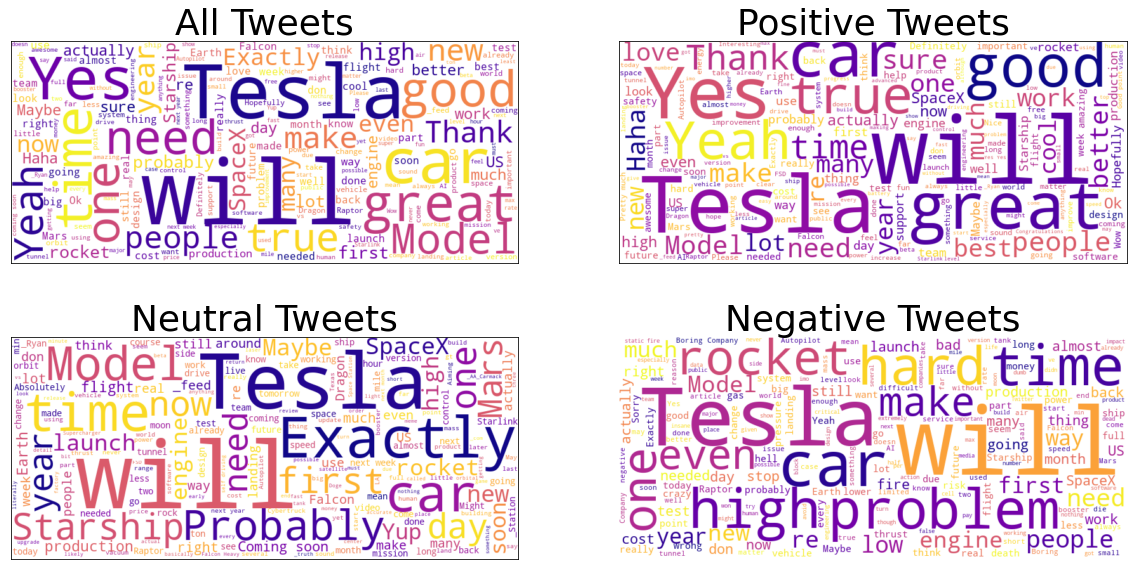

In [ ]:
# plots four WordCloud subplots: all tweets, positive tweets, negative tweets, and neutral tweets
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0, 0].imshow(total_wordcloud, interpolation = "bilinear")
axs[0, 0].set_title("All Tweets", fontsize=36)
axs[0, 1].imshow(positive_wordcloud, interpolation = "bilinear")
axs[0, 1].set_title("Positive Tweets", fontsize=36)
axs[1, 0].imshow(neutral_wordcloud, interpolation = "bilinear")
axs[1, 0].set_title("Neutral Tweets", fontsize=36)
axs[1, 1].imshow(negative_wordcloud, interpolation = "bilinear")
axs[1, 1].set_title("Negative Tweets", fontsize=36)
plt.grid(False)
plt.axis("off")
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

## **Influence on the Market:**

In [ ]:
## BITCOIN
# uses the yfinance library to create a Bitcoin DataFrame with Bitcoin stock data
bitcoin_df = yf.Ticker("BTC-USD").history(start="2019-1-01", end="2022-4-27")

# create a Bitcoin frequency dictionary that counts the amount of Bitcoin mentions on Twitter each day
bitcoin_frequency = {}
for item in bitcoin_dates:
   if item in bitcoin_frequency:
      bitcoin_frequency[item] += 1
   else:
      bitcoin_frequency[item] = 1
  
# create a list of dates in string format within the specified timeframe
bitcoin_plot_dates = pd.date_range('2019-01-01', '2022-04-27', freq='D').tolist()
bitcoin_string_plot_dates = []
for i in range(len(bitcoin_plot_dates)):
  bitcoin_string_plot_dates.append(bitcoin_plot_dates[i].strftime("%Y-%m-%d"))

# creates a list that counts the amount of Bitcoin mentions per day using the Bitcoin frequency dictionary
bitcoin_tweet_freq = [0] * len(bitcoin_plot_dates)
for i in range(len(bitcoin_plot_dates)):
  if bitcoin_string_plot_dates[i] in bitcoin_frequency:
    bitcoin_tweet_freq[i] = bitcoin_frequency[bitcoin_string_plot_dates[i]]

# normalizes the Bitcoin tweet frequency list
for i in range(len(bitcoin_tweet_freq)):
  bitcoin_tweet_freq[i] = (bitcoin_tweet_freq[i]-min(bitcoin_tweet_freq)) / (max(bitcoin_tweet_freq)-min(bitcoin_tweet_freq))

## TESLA
# uses the yfinance library to create a Tesla DataFrame with Tesla stock data
tesla_df = yf.Ticker("TSLA").history(start="2014-1-01", end="2022-4-27")

# create a Tesla frequency dictionary that counts the amount of Tesla mentions on Twitter each day
tesla_frequency = {}
for item in tesla_dates:
   if item in tesla_frequency:
      tesla_frequency[item] += 1
   else:
      tesla_frequency[item] = 1

# create a list of dates in string format within the specified timeframe
tesla_plot_dates = pd.date_range('2014-01-01', '2022-04-27', freq='D').tolist()
tesla_string_plot_dates = []
for i in range(len(tesla_plot_dates)):
  tesla_string_plot_dates.append(tesla_plot_dates[i].strftime("%Y-%m-%d"))

# creates a list that counts the amount of Tesla mentions per day using the Tesla frequency dictionary
tesla_tweet_freq = [0] * len(tesla_plot_dates)
for i in range(len(tesla_plot_dates)):
  if tesla_string_plot_dates[i] in tesla_frequency:
    tesla_tweet_freq[i] = tesla_frequency[tesla_string_plot_dates[i]]

# normalizes the Tesla tweet frequency list
for i in range(len(tesla_tweet_freq)):
  tesla_tweet_freq[i] = (tesla_tweet_freq[i]-min(tesla_tweet_freq)) / (max(tesla_tweet_freq)-min(tesla_tweet_freq))

## TWITTER
# uses the yfinance library to create a Twitter DataFrame with Twitter stock data
twitter_df = yf.Ticker("TWTR").history(start="2014-1-01", end="2022-4-27")

# create a Twitter frequency dictionary that counts the amount of Twitter mentions on Twitter each day
twitter_frequency = {}
for item in twitter_dates:
   if item in twitter_frequency:
      twitter_frequency[item] += 1
   else:
      twitter_frequency[item] = 1

# create a list of dates in string format within the specified timeframe
twitter_plot_dates = pd.date_range('2014-01-01', '2022-04-27', freq='D').tolist()
twitter_string_plot_dates = []
for i in range(len(twitter_plot_dates)):
  twitter_string_plot_dates.append(twitter_plot_dates[i].strftime("%Y-%m-%d"))

# creates a list that counts the amount of Twitter mentions per day using the Twitter frequency dictionary
twitter_tweet_freq = [0] * len(twitter_plot_dates)
for i in range(len(twitter_plot_dates)):
  if twitter_string_plot_dates[i] in twitter_frequency:
    twitter_tweet_freq[i] = twitter_frequency[twitter_string_plot_dates[i]]

# normalizes the Twitter tweet frequency list
for i in range(len(twitter_tweet_freq)):
  twitter_tweet_freq[i] = (twitter_tweet_freq[i]-min(twitter_tweet_freq)) / (max(twitter_tweet_freq)-min(twitter_tweet_freq))

## DOGECOIN
# create a Dogecoin frequency dictionary that counts the amount of Dogecoin mentions on Twitter each day
dogecoin_frequency = {}
for item in dogecoin_dates:
   if item in dogecoin_frequency:
      dogecoin_frequency[item] += 1
   else:
      dogecoin_frequency[item] = 1

# create a list of dates in string format within the specified timeframe
dogecoin_plot_dates = pd.date_range('2017-11-09', '2022-03-25', freq='D').tolist()
dogecoin_string_plot_dates = []
for i in range(len(dogecoin_plot_dates)):
  dogecoin_string_plot_dates.append(dogecoin_plot_dates[i].strftime("%Y-%m-%d"))

# creates a list that counts the amount of Dogecoin mentions per day using the Dogecoin frequency dictionary
dogecoin_tweet_freq = [0] * len(dogecoin_plot_dates)
for i in range(len(dogecoin_plot_dates)):
  if dogecoin_string_plot_dates[i] in dogecoin_frequency:
    dogecoin_tweet_freq[i] = dogecoin_frequency[dogecoin_string_plot_dates[i]]

# normalizes the Dogecoin tweet frequency list
for i in range(len(dogecoin_tweet_freq)):
  dogecoin_tweet_freq[i] = (dogecoin_tweet_freq[i]-min(dogecoin_tweet_freq)) / (max(dogecoin_tweet_freq)-min(dogecoin_tweet_freq))

## SPACEX
# create a Spacex frequency dictionary that counts the amount of SpaceX mentions on Twitter each day
spacex_frequency = {}
for item in spacex_dates:
   if item in spacex_frequency:
      spacex_frequency[item] += 1
   else:
      spacex_frequency[item] = 1

# create a list of dates in string format within the specified timeframe
spacex_plot_dates = pd.date_range('2010-01-01', '2022-04-27', freq='D').tolist()
spacex_string_plot_dates = []
for i in range(len(spacex_plot_dates)):
  spacex_string_plot_dates.append(spacex_plot_dates[i].strftime("%Y-%m-%d"))

# creates a list that counts the amount of SpaceX mentions per day using the SpaceX frequency dictionary
spacex_tweet_freq = [0] * len(spacex_plot_dates)
for i in range(len(spacex_plot_dates)):
  if spacex_string_plot_dates[i] in spacex_frequency:
    spacex_tweet_freq[i] = spacex_frequency[spacex_string_plot_dates[i]]

# normalizes the SpaceX tweet frequency list
for i in range(len(spacex_tweet_freq)):
  spacex_tweet_freq[i] = (spacex_tweet_freq[i]-min(spacex_tweet_freq)) / (max(spacex_tweet_freq)-min(spacex_tweet_freq))

## TOTAL
# create a total frequency dictionary that counts the number of tweets each day
total_frequency = {}
for item in total_dates:
   if item in total_frequency:
      total_frequency[item] += 1
   else:
      total_frequency[item] = 1

# create a list of dates in string format within the specified timeframe
total_plot_dates = pd.date_range('2010-01-01', '2022-04-27', freq='D').tolist()
total_string_plot_dates = []
for i in range(len(total_plot_dates)):
  total_string_plot_dates.append(total_plot_dates[i].strftime("%Y-%m-%d"))

# creates a list that counts the total tweets per day using the total tweets frequency dictionary
total_tweet_freq = [0] * len(total_plot_dates)
for i in range(len(total_plot_dates)):
  if total_string_plot_dates[i] in total_frequency:
    total_tweet_freq[i] = total_frequency[total_string_plot_dates[i]]

# normalizes the total tweet frequency list
for i in range(len(total_tweet_freq)):
  total_tweet_freq[i] = (total_tweet_freq[i]-min(total_tweet_freq)) / (max(total_tweet_freq)-min(total_tweet_freq))

In [ ]:
# creates a 2 by 2 subplot (Bitcoin, Dogecoin, Tesla, and Twitter) that plot the stock market and tweet frequency, with normalized parameters
fig = make_subplots(rows=2, cols=2, subplot_titles=("Bitcoin Stock", "Dogecoin Stock", "Tesla Stock", "Twitter Stock"))

## BITCOIN
# calculates the moving 50 day average stock price of Bitcoin
bitcoin_ma50 = bitcoin_df.Open.rolling(50).mean()

# creates a plot with the moving 50 day average of Bitcoin stock, tweet frequency of Bitcoin, and stock price of Bitcoin
fig.add_trace(go.Scatter(x=bitcoin_df.index, y=norm(bitcoin_ma50),
              mode="lines",
              name="Price of Bitcoin ($) (Moving 50 Day Average)", marker=dict(color="rgb(101, 119, 134)")),
              row=1, col=1)
fig.add_trace(go.Scatter(x=bitcoin_plot_dates, y=bitcoin_tweet_freq,
              mode="lines", name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")),
              row=1, col=1)
fig.add_trace(go.Scatter(x=bitcoin_df.index, y=norm(bitcoin_df.Open),
              mode="lines",
              name="Price of Bitcoin ($)", marker=dict(color="rgb(255, 153, 0)")), 
              row=1, col=1)

## DOGECOIN
# calculates the moving 50 day average stock price of Dogecoin
dogecoin_ma50 = dogecoin_df.Open.rolling(50).mean()

# creates a plot with the moving 50 day average of Dogecoin stock, tweet frequency of Dogecoin, and stock price of Dogecoin
fig.add_trace(go.Scatter(x=dogecoin_df.index, y=norm(dogecoin_ma50),
              mode="lines",
              name="Price of Dogecoin ($) (Moving 50 Day Average)", marker=dict(color="rgb(101, 119, 134)")),
              row=1, col=2)
fig.add_trace(go.Scatter(x=dogecoin_plot_dates, y=dogecoin_tweet_freq,
              mode="lines", name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")),
              row=1, col=2)
fig.add_trace(go.Scatter(x=dogecoin_df.index, y=norm(dogecoin_df.Open),
              mode="lines",
              name="Price of Dogecoin ($)", marker=dict(color="rgb(0, 0, 0)")), 
              row=1, col=2)

## TESLA
# calculates the moving 50 day average stock price of Tesla
tesla_ma50 = tesla_df.Open.rolling(50).mean()

# creates a plot with the moving 50 day average of Tesla stock, tweet frequency of Tesla, and stock price of Tesla
fig.add_trace(go.Scatter(x=tesla_df.index, y=norm(tesla_ma50),
              mode="lines",
              name="Price of Tesla ($) (Moving 50 Day Average)", marker=dict(color="rgb(101, 119, 134)")),
              row=2, col=1)
fig.add_trace(go.Scatter(x=tesla_plot_dates, y=tesla_tweet_freq,
              mode="lines", name="Number of Tweets",  marker=dict(color="rgb(0, 172, 238)")),
              row=2, col=1)
fig.add_trace(go.Scatter(x=tesla_df.index, y=norm(tesla_df.Open),
              mode="lines",
              name="Price of Tesla ($)", marker=dict(color="rgb(204, 0, 0)")), 
              row=2, col=1)

## TWITTER
# calculates the moving 50 day average stock price of Twitter
twitter_ma50 = twitter_df.Open.rolling(50).mean()

# creates a plot with the moving 50 day average of Twitter stock, overall tweet frequency, and stock price of Twitter
fig.add_trace(go.Scatter(x=twitter_df.index, y=norm(twitter_ma50),
              mode="lines",
              name="Price of Twitter ($) (Moving 50 Day Average)", marker=dict(color="rgb(101, 119, 134)")),
              row=2, col=2)
fig.add_trace(go.Scatter(x=twitter_plot_dates, y=twitter_tweet_freq,
              mode="lines", name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")),
              row=2, col=2)
fig.add_trace(go.Scatter(x=twitter_df.index, y=norm(twitter_df.Open),  marker=dict(color="rgb(0, 255, 0)"),
              mode="lines",
              name="Price of Twitter ($)"), 
              row=2, col=2)

# updates plots to have proper axis titles and sizes
fig.update_xaxes(title_text="Date", row = 1, col = 1)
fig.update_xaxes(title_text="Date", row = 1, col = 2)
fig.update_xaxes(title_text="Date", row = 2, col = 1)
fig.update_xaxes(title_text="Date", row = 2, col = 2)
fig.update_yaxes(title_text="Normalized Parameters", row = 1, col = 1)
fig.update_yaxes(title_text="Normalized Parameters", row = 1, col = 2)
fig.update_yaxes(title_text="Normalized Parameters", row = 2, col = 1)
fig.update_yaxes(title_text="Normalized Parameters", row = 2, col = 2)
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,)

# shows the plots
fig.show()

# saves plots to html using plotly.io
with open('viz_stocks_tweets.html', 'w') as fh:
  pio.write_html(fig, file='viz_stocks_tweets.html', auto_open=True, full_html=False)

#**Google Search Trends:**

In [ ]:
## DOGECOIN
# creates a Dogecoin DataFrame that has Google Trends data
dogecoin_pytrend = TrendReq(hl='en-US', tz=360)
dogecoin_pytrend.build_payload(["Dogecoin"])
dogecoin_interest_df = dogecoin_pytrend.interest_over_time()

## BITCOIN
# creates a Bitcoin DataFrame that has Google Trends data
bitcoin_pytrend = TrendReq(hl='en-US', tz=360)
bitcoin_pytrend.build_payload(["Bitcoin"])
bitcoin_interest_df = bitcoin_pytrend.interest_over_time()

## SPACEX
# creates a SpaceX DataFrame that has Google Trends data
spacex_pytrend = TrendReq(hl='en-US', tz=360)
spacex_pytrend.build_payload(["Spacex"])
spacex_interest_df = spacex_pytrend.interest_over_time()

## TESLA
# creates a Tesla DataFrame that has Google Trends data
tesla_pytrend = TrendReq(hl='en-US', tz=360)
tesla_pytrend.build_payload(["Tesla"])
tesla_interest_df = tesla_pytrend.interest_over_time()

# ELON MUSK
# creates an Elon Musk DataFrame that has Google Trends data
elonmusk_pytrend = TrendReq(hl='en-US', tz=360)
elonmusk_pytrend.build_payload(["Elon_musk"])
elonmusk_interest_df = elonmusk_pytrend.interest_over_time()

In [ ]:
# creates a 2 by 3 subplot (Google search trends of Bitcoin, Dogecoin, Elon Musk, Tesla, and Spacex)
fig = make_subplots(rows=2, cols=3, subplot_titles=("Google Search Trends of Bitcoin", "Google Search Trends of Dogecoin", 
                                                    "Google Search Trends of Elon Musk", "Google Search Trends of Tesla", 
                                                    "Google Search Trends of SpaceX"))

## BITCOIN
# creates a plot with the tweet frequency of Bitcoin and Google search trends for Bitcoin
fig.add_trace(go.Scatter(x=bitcoin_plot_dates, y=bitcoin_tweet_freq, 
              mode="lines",
              name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=bitcoin_interest_df.index, y=norm(bitcoin_interest_df.Bitcoin),
              mode="lines", name="Google Search Trends for Bitcoin", marker=dict(color="rgb(255, 153, 0)")),
              row=1, col=1)

## DOGECOIN
# creates a plot with the tweet frequency of Dogecoin and Google search trends for Dogecoin
fig.add_trace(go.Scatter(x=dogecoin_plot_dates, y=dogecoin_tweet_freq, 
              mode="lines",
              name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")), 
              row=1, col=2)
fig.add_trace(go.Scatter(x=dogecoin_interest_df.index, y=norm(dogecoin_interest_df.Dogecoin),
              mode="lines", name="Google Search Trends for Dogecoin", marker=dict(color="rgb(0, 0, 0)")),
              row=1, col=2)

## ELON MUSK
# creates a plot with the tweet frequency of Elon Musk and Google search trends for Elon Musk
fig.add_trace(go.Scatter(x=total_plot_dates, y=total_tweet_freq, 
              mode="lines",
              name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")), 
              row=1, col=3)
fig.add_trace(go.Scatter(x=elonmusk_interest_df.index, y=norm(elonmusk_interest_df.Elon_musk),
              mode="lines", name="Google Search Trends for Elon Musk", marker=dict(color="rgb(102, 51, 153)")),
              row=1, col=3)

## TESLA
# creates a plot with the tweet frequency of Tesla and Google search trends for Tesla 
fig.add_trace(go.Scatter(x=tesla_plot_dates, y=tesla_tweet_freq, 
              mode="lines",
              name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=tesla_interest_df.index, y=norm(tesla_interest_df.Tesla),
              mode="lines", name="Google Search Trends for Tesla", marker=dict(color="rgb(204, 0, 0)")),
              row=2, col=1)

## SPACEX
# creates a plot with the tweet frequency of SpaceX and Google search trends for Spacex
fig.add_trace(go.Scatter(x=spacex_plot_dates, y=spacex_tweet_freq, 
              name="Number of Tweets", marker=dict(color="rgb(0, 172, 238)")), 
              row=2, col=2)
fig.add_trace(go.Scatter(x=spacex_interest_df.index, y=norm(spacex_interest_df.Spacex),
              name="Google Search Trends for Spacex", marker=dict(color="rgb(0, 225, 0)")),
              row=2, col=2)

# updates plots to have proper axis titles, domains, and sizes
fig.update_xaxes(title_text="Date", range=[pd.to_datetime('2020-01-01'),pd.to_datetime('2021-10-01')], row = 1, col = 1)
fig.update_xaxes(title_text="Date", range=[pd.to_datetime('2020-09-01'),pd.to_datetime('2022-01-10')], row = 1, col = 2)
fig.update_xaxes(title_text="Date", range=[pd.to_datetime('2017-04-27'),pd.to_datetime('2022-04-27')], row = 1, col = 3)
fig.update_xaxes(title_text="Date", range=[pd.to_datetime('2018-03-01'),pd.to_datetime('2022-04-27')], row = 2, col = 1)
fig.update_xaxes(title_text="Date", range=[pd.to_datetime('2017-06-01'),pd.to_datetime('2020-08-01')], row = 2, col = 2)
fig.update_yaxes(title_text="Normalized Parameters", row = 1, col = 1)
fig.update_yaxes(title_text="Normalized Parameters", row = 1, col = 2)
fig.update_yaxes(title_text="Normalized Parameters", row = 1, col = 3)
fig.update_yaxes(title_text="Normalized Parameters", row = 2, col = 1)
fig.update_yaxes(title_text="Normalized Parameters", row = 2, col = 2)
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,)

# shows the plots
fig.show()

# saves plots to html using plotly.io
with open('viz_trends_tweets.html', 'w') as fh:
  pio.write_html(fig, file='viz_trends_tweets.html', auto_open=True, full_html=False)